In [1]:
from collections import Counter
import scanpy.api  as sc
import numpy as np
import pandas as pd
import anndata
import os
%matplotlib inline

/home/mt/code/utils/miniconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/mt/code/utils/miniconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [ ]:

f = sc.read("/ye/yelabstore2/mtschmitz/dolomite/demux/pollena-Human/summary/Human_S1_L001_umi_expression_matrix.tsv").transpose()
g = sc.read("/ye/yelabstore2/mtschmitz/dolomite/demux/pollena-Human/summary/Human_S1_L002_umi_expression_matrix.tsv").transpose()
c = f.concatenate(g,index_unique=None)

len(c.obs_names)
len(set(c.obs_names))

cc = Counter(c.obs_names)
cc.most_common(10)



In [ ]:
cc.most_common(10)

In [ ]:
X=[]
for u in set(c.obs_names):
    X.append(c.X[c.obs_names==u,:].sum(axis=0))
X=np.array(X)

In [5]:
adata = anndata.AnnData(X= X,var = pd.DataFrame(index=c.var_names),obs=pd.DataFrame(index=list(set(c.obs_names))))

In [6]:
sc.pp.filter_cells(adata, min_genes=500)
print(adata.shape)

(2913, 8712)


In [7]:
mito_genes = [name for name in adata.var_names if name.startswith('MT-')]
ribo_genes = [name for name in adata.var_names if name.startswith('RPS') or name.startswith('RPL') ]

# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary, as X is sparse - it transform to a dense array after summing
adata.obs['percent_mito'] = np.sum(
    adata[:, mito_genes].X, axis=1) / np.sum(adata.X, axis=1)
adata.obs['percent_ribo'] = np.sum(
    adata[:, ribo_genes].X, axis=1) / np.sum(adata.X, axis=1)
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1)
sc.pp.filter_genes(adata, min_cells=100)

adata=adata[np.argsort(adata.obs['n_counts']),:]

In [8]:
adata.obs.to_csv(os.path.expanduser('~/HumanObs.txt'))

,n_genes,percent_mito,percent_ribo,n_counts
CCATTTGAAATC,61,0.000000,0.038095,105.0
ACGGGTACCTCT,43,0.000000,0.090909,66.0
TGCTAGCAAGTG,147,0.025735,0.143382,272.0
ATCCCGGGGCTA,129,0.022026,0.242291,227.0
CATTCCAGGGCC,45,0.064516,0.107527,93.0
CTTCGCTTCAGT,80,0.025641,0.192308,156.0
ACCGTCCGAATT,49,0.000000,0.089888,89.0
TGAGAGCATCGC,72,0.050633,0.050633,79.0
ATGCTCGCTATT,33,0.000000,0.155172,58.0
ACTAGTTGAGGG,48,0.238532,0.091743,109.0


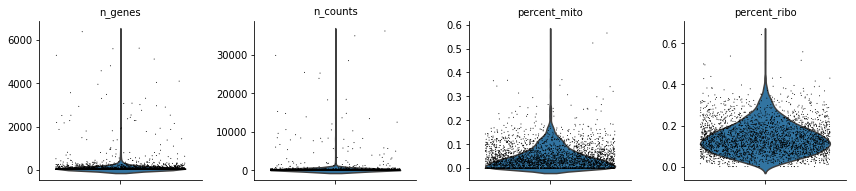

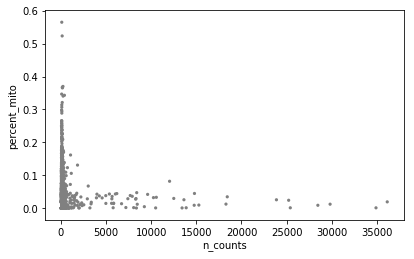

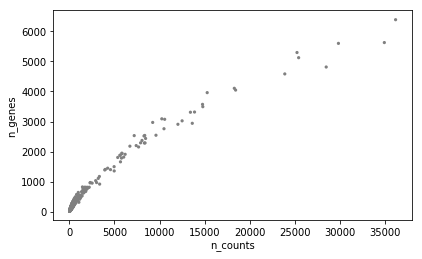

In [9]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito','percent_ribo'],
             jitter=0.4, multi_panel=True)
sc.pl.scatter(adata, x='n_counts', y='percent_mito')
sc.pl.scatter(adata, x='n_counts', y='n_genes')

/home/mt/code/utils/miniconda3/lib/python3.6/site-packages/umi_tools/umi_methods.py:22: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/mt/code/utils/miniconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/mt/code/utils/miniconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/mt/code/utils/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/mt/code/utils/miniconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/mt/code/utils/miniconda3/lib/python3.6/site-pa

36.157000000000004
[4.55819239 4.54294985 4.47455133 ... 1.5797836  1.5797836  1.56820172]
(array([3737, 4609, 5186, 6220, 6692, 7571, 8343, 9212, 9842]),)
1


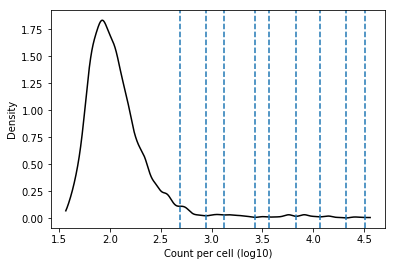

In [10]:
from umi_tools import umi_methods
import matplotlib
from matplotlib import pyplot as plt
from collections import Counter
cell_barcode_counts=Counter(adata.obs.n_counts.to_dict())
#d=umi_tools.umi_methods.getKneeEstimate(Counter(adata.obs.n_counts.to_dict()),expect_cells=15000,plotfile_prefix='KneeOrganoid')

import matplotlib.lines as mlines
from functools import partial
from scipy.signal import argrelextrema
from scipy.stats import gaussian_kde
import umi_tools.Utilities as U

threshold = 0.001 * cell_barcode_counts.most_common(1)[0][1]

counts = sorted(cell_barcode_counts.values(), reverse=True)
counts_thresh = [x for x in counts if x > threshold]
log_counts = np.log10(counts_thresh)
print(threshold)
print(log_counts)
density = gaussian_kde(log_counts, bw_method=0.1)

xx_values = 10000  # how many x values for density plot
xx = np.linspace(log_counts.min(), log_counts.max(), xx_values)

local_min = None
local_mins = argrelextrema(density(xx), np.less)
print(local_mins)
print(len(local_mins))
fig = plt.figure()
fig1 = fig.add_subplot(111)
fig1.plot(xx, density(xx), 'k')
fig1.set_xlabel("Count per cell (log10)")
fig1.set_ylabel("Density")
for pos in xx[local_mins]:
    fig1.axvline(x=pos, ls="dashed")

In [11]:
adata.raw = adata

In [12]:
sc.pp.normalize_per_cell(adata,counts_per_cell=1e4)
sc.pp.log1p(adata)
sc.pp.scale(adata, max_value=10)
sc.pp.regress_out(adata,'n_counts')

In [13]:
sc.tl.pca(adata)
adata.obsm['X_pca'] *= -1  # multiply by -1 to match Seurat

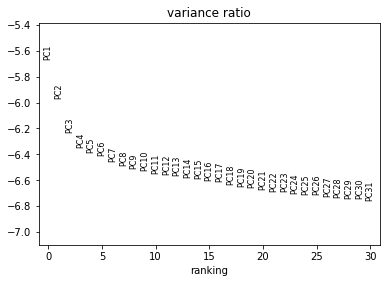

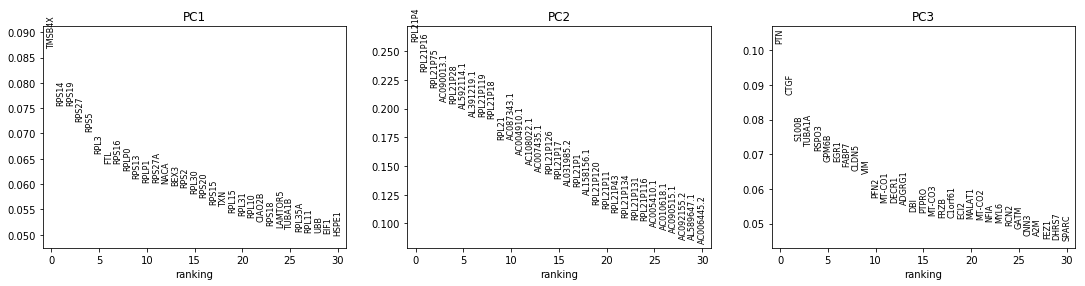

In [14]:
sc.pl.pca_variance_ratio(adata, log=True)
sc.pl.pca_loadings(adata)

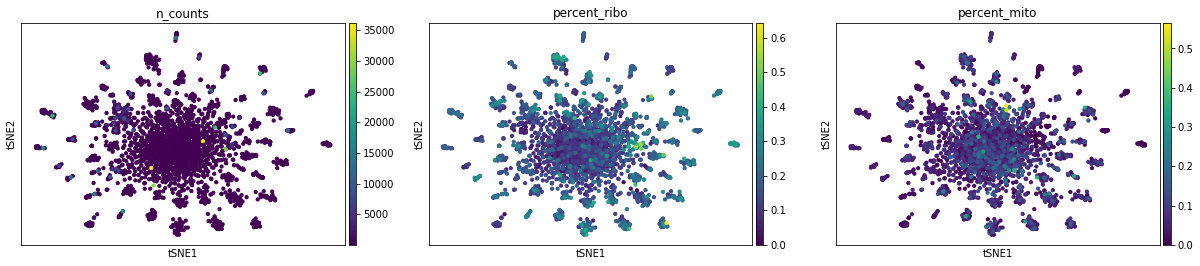

In [15]:
sc.tl.tsne(adata, random_state=2, n_pcs=50)
sc.pl.tsne(adata, color=['n_counts','percent_ribo','percent_mito'])

In [ ]:
sc.pp.neighbors(adata, n_neighbors=25)
sc.tl.louvain(adata)
sc.pl.tsne(adata,color=['louvain','n_counts'])

In [ ]:
sc.tl.rank_genes_groups(adata, 'louvain')
sc.pl.rank_genes_groups(adata, n_genes=30, save='.pdf')
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(20)


In [ ]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame({group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'scores']}).head(20)

In [ ]:
adata = anndata.AnnData(X= X,var = pd.DataFrame(index=c.var_names),obs=pd.DataFrame(index=list(set(c.obs_names))))

In [ ]:
sc.pp.filter_cells(adata, min_genes=500)
sc.pp.filter_genes(adata, min_cells=3)
print(adata.shape)

In [ ]:
sc.pp.normalize_per_cell(adata,counts_per_cell=1e4)
sc.pp.log1p(adata)
sc.pp.scale(adata, max_value=10)
sc.pp.regress_out(adata,'n_counts')
sc.tl.pca(adata)
adata.obsm['X_pca'] *= -1  # multiply by -1 to match Seurat
sc.tl.tsne(adata)
sc.pp.neighbors(adata)
sc.tl.louvain(adata)
sc.pl.tsne(adata,color=['louvain','n_counts','HES5','PTN','VIM'])

In [ ]:
sc.tl.rank_genes_groups(adata, groupby='louvain',use_raw=True)
sc.pl.rank_genes_groups(adata, n_genes=30, save='.pdf')
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(20)


In [ ]:
adata

In [ ]:
from IPython.display import Javascript
def save_notebook():
    return display(Javascript("IPython.notebook.save_notebook()"),
                   include=['application/javascript'])

def output_HTML(read_file, output_file):
    from nbconvert import HTMLExporter
    import codecs
    import nbformat
    exporter = HTMLExporter()
    # read_file is '.ipynb', output_file is '.html'
    output_notebook = nbformat.read(read_file, as_version=4)
    output, resources = exporter.from_notebook_node(output_notebook)
    codecs.open(output_file, 'w', encoding='utf-8').write(output)
import time
save_notebook()
time.sleep(3)
current_file = './Dolomite_Dropseq_Human.ipynb'
output_file = '/home/mt/Downloads/Dolomite_Dropseq_Human.html' 
output_HTML(current_file, output_file)